# Car Prices Model

Notebook to predict car prices using a dataset from Kaggle. You can find more information about the dataset [here][dataset].

[dataset]: https://www.kaggle.com/datasets/hellbuoy/car-price-prediction


In [55]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os

In [56]:
# Create directories to export reports and models
os.makedirs("reports", exist_ok=True)
os.makedirs("models", exist_ok=True)

In [57]:
# Read the dataset
df_car_prices = pd.read_csv("datasets/car_prices.csv")

In [58]:
# Show information about the dataset
df_car_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [59]:
# Drop columns "car_ID" and "CarName" because they are not relevant to the model. We could use the
# brand of the car, but since the problem is predicting the price for a new company looking to sell
# cars on USA, the brand is not relevant.
df_car_prices = df_car_prices.drop(columns=["car_ID", "CarName"])

## Exploratory Data Analysis

### Data Overview

| Column Name        | Type       | Description                                                                                                             |
| ------------------ | ---------- | ----------------------------------------------------------------------------------------------------------------------- |
| symboling          | Discrete   | Its assigned insurance risk rating, A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe. |
| fueltype           | Nominal    | Car fuel type i.e gas or diesel                                                                                         |
| aspiration         | Nominal    | Aspiration used in a car                                                                                                |
| doornumber         | Ordinal    | Number of doors in a car                                                                                                |
| carbody            | Nominal    | body of car                                                                                                             |
| drivewheel         | Nominal    | type of drive wheel                                                                                                     |
| enginelocation     | Nominal    | Location of car engine                                                                                                  |
| wheelbase          | Continuous | Weelbase of car                                                                                                         |
| carlength          | Continuous | Length of car                                                                                                           |
| carwidth           | Continuous | Width of car                                                                                                            |
| carheight          | Continuous | height of car                                                                                                           |
| curbweight         | Continuous | The weight of a car without occupants or baggage.                                                                       |
| enginetype         | Nominal    | Type of engine.                                                                                                         |
| cylindernumber     | Ordinal    | cylinder placed in the car                                                                                              |
| enginesize         | Continuous | Size of car                                                                                                             |
| fuelsystem         | Nominal    | Fuel system of car                                                                                                      |
| boreratio          | Continuous | Boreratio of car                                                                                                        |
| stroke             | Continuous | Stroke or volume inside the engine                                                                                      |
| compressionratio   | Continuous | compression ratio of car                                                                                                |
| horsepower         | Continuous | Horsepower                                                                                                              |
| peakrpm            | Continuous | car peak rpm                                                                                                            |
| citympg            | Continuous | Mileage in city                                                                                                         |
| highwaympg         | Continuous | Mileage on highway                                                                                                      |
| **price (target)** | Continuous | Price of car                                                                                                            |


In [60]:
df_car_prices.head(10)

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
4,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
5,2,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,1,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,1,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,1,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,0,gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


In [61]:
df_car_prices.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [62]:
import sweetviz as sv

report = sv.analyze(df_car_prices)
report.show_html("reports/car_prices_report.html", open_browser=False)

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)

Report reports/car_prices_report.html was generated.


In [63]:
# Drop "enginelocation" column because we identified it has over 99% of the values as "front"
df_car_prices = df_car_prices.drop(columns=["enginelocation"])

## Feature engineering


In [64]:
# Convert ordinal columns to numeric values
df_car_prices.doornumber = df_car_prices.doornumber.map(
    {
        "two": 2,
        "four": 4,
    }
)

df_car_prices.cylindernumber = df_car_prices.cylindernumber.map(
    {
        "two": 2,
        "three": 3,
        "four": 4,
        "five": 5,
        "six": 6,
        "eight": 8,
        "twelve": 12,
    }
)

In [65]:
# Apply OneHotEncoding to categorial features
categorial_features = [
    "fueltype",
    "aspiration",
    "carbody",
    "drivewheel",
    "enginetype",
    "fuelsystem",
]

df_car_prices = pd.get_dummies(
    df_car_prices,
    columns=categorial_features,
    drop_first=True,
    dtype="int64",
)

In [66]:
numeric_features = [
    "wheelbase",
    "carlength",
    "carwidth",
    "carheight",
    "curbweight",
    "enginesize",
    "boreratio",
    "stroke",
    "compressionratio",
    "horsepower",
    "peakrpm",
    "citympg",
    "highwaympg",
    "cylindernumber",
    "doornumber",
]
features = numeric_features + [
    col
    for col in df_car_prices.columns
    if col not in numeric_features and col != "price"
]

In [67]:
df_car_prices.head()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,...,0,0,0,0,0,0,0,1,0,0
1,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,...,0,0,0,0,0,0,0,1,0,0
2,2,4,99.4,176.6,66.4,54.3,2824,5,136,3.19,...,0,0,0,0,0,0,0,1,0,0
3,1,2,94.5,171.2,65.5,52.4,2823,6,152,2.68,...,0,1,0,0,0,0,0,1,0,0
4,2,4,99.8,176.6,66.2,54.3,2337,4,109,3.19,...,0,0,0,0,0,0,0,1,0,0


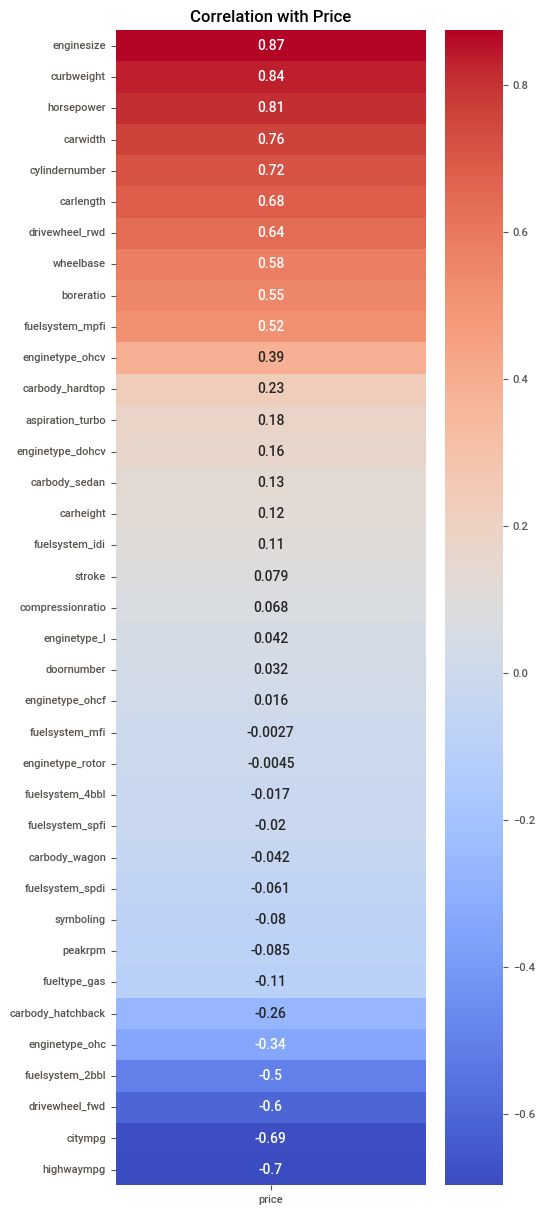

In [68]:
corr_matrix = df_car_prices.corr()
corr_matrix_with_price = (
    corr_matrix["price"].drop("price").sort_values(ascending=False).to_frame()
)

plt.figure(figsize=(5, 15))
plt.title("Correlation with Price")
sns.heatmap(
    corr_matrix_with_price,
    annot=True,
    cmap="coolwarm",
)
plt.savefig("reports/car_prices_correlation.png")

## Training the model


In [86]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error

In [70]:
X = df_car_prices[features]
y = df_car_prices["price"]

In [71]:
X.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,0,0,0,0,0,1,0,0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,0,0,0,0,0,1,0,0
2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,...,0,0,0,0,0,0,0,1,0,0
3,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,...,0,1,0,0,0,0,0,1,0,0
4,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,...,0,0,0,0,0,0,0,1,0,0


In [72]:
y.head()

0    13495.0
1    16500.0
2    17450.0
3    16500.0
4    13950.0
Name: price, dtype: float64

In [79]:
def evaluate_model(X_train, X_test, y_train, y_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    lin_reg = LinearRegression()
    lin_reg.fit(X_train_scaled, y_train)
    y_pred = lin_reg.predict(X_test_scaled)

    return r2_score(y_test, y_pred)

In [80]:
best_r2, best_random_state = -np.inf, None

for random_state in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(
        X,
        y,
        test_size=0.2,
        random_state=random_state,
    )
    r2 = evaluate_model(X_train, X_test, y_train, y_test)

    if r2 > best_r2:
        best_r2 = r2
        best_random_state = random_state

print(f"Best R2: {best_r2}")
print(f"Best Random State: {best_random_state}")

Best R2: 0.9582137769124226
Best Random State: 463


In [81]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=best_random_state,
)

In [82]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [83]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

LinearRegression()

In [84]:
y_pred = lin_reg.predict(X_test_scaled)

In [88]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"R2: {r2}")
print(f"MAE: {mae}")

R2: 0.9582137769124226
MAE: 1576.5409062430826


## Residual Analysis


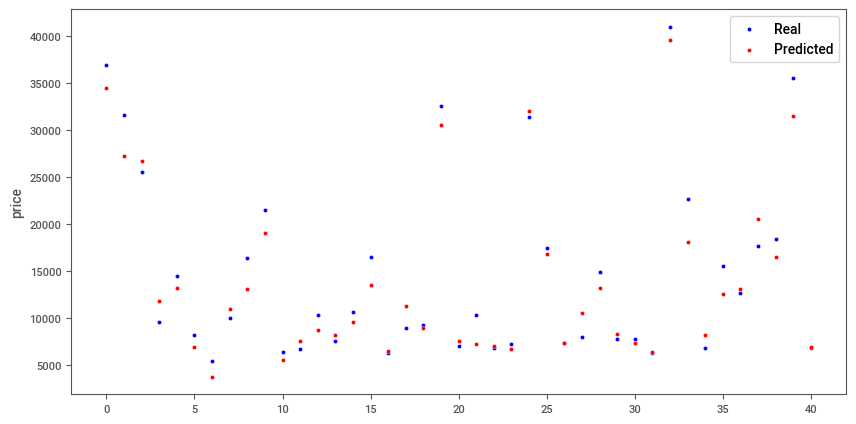

In [90]:
# Display the difference between the real and predicted values of the test set using a scatter plot
x_axis = range(len(y_test))
plt.figure(figsize=(10, 5))
sns.scatterplot(x=x_axis, y=y_test, color="blue", label="Real")
sns.scatterplot(x=x_axis, y=y_pred.reshape(-1), color="red", label="Predicted")
plt.legend()
plt.show()

In [91]:
residuals = y_test - y_pred

In [92]:
from scipy.stats import zscore

# Calculate the z-scores of the residuals (transform the residuals into a standard normal distribution)
residuals_z = zscore(residuals)

Text(0.5, 1.0, 'Residuals vs Predictions')

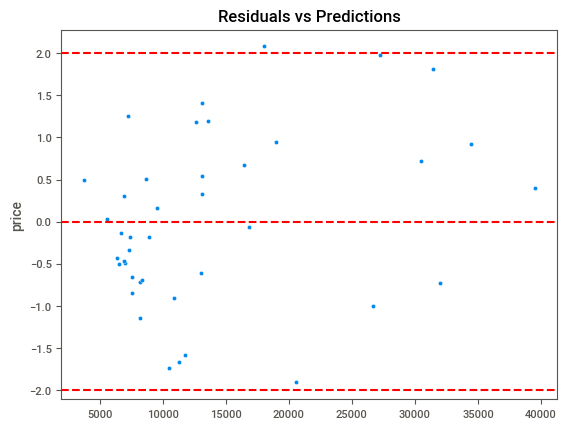

In [93]:
# Plot residuals vs predictions to check for homoscedasticity
sns.scatterplot(x=y_pred, y=residuals_z)
plt.axhline(y=0, color="r", linestyle="--")
plt.axhline(y=-2, color="r", linestyle="--")
plt.axhline(y=2, color="r", linestyle="--")
plt.title("Residuals vs Predictions")

Text(0.5, 1.0, 'Residuals Distribution')

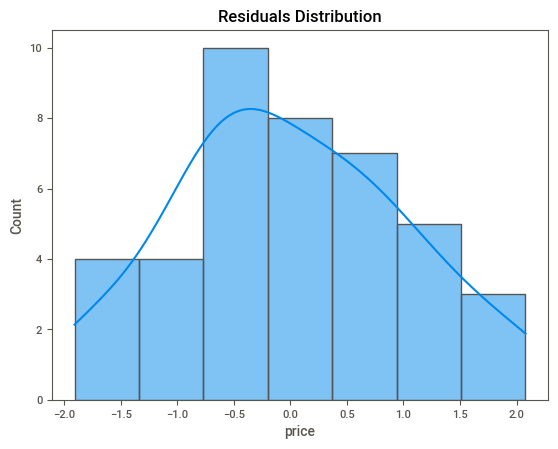

In [98]:
sns.histplot(residuals_z, kde=True)
plt.title("Residuals Distribution")

Text(0.5, 1.0, 'Q-Q Plot')

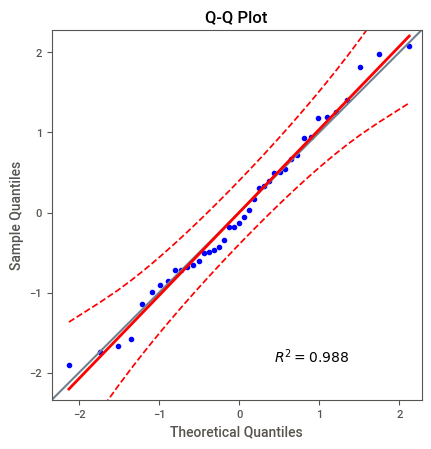

In [101]:
import pingouin as pg

pg.qqplot(residuals_z, dist="norm", confidence=0.95)
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.title("Q-Q Plot")